# Imports

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
from corner import corner
from scipy import stats
from sklearn.preprocessing import StandardScaler
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PDAG2DAG import pdag2dag
from estimate_parameters import estimate_parameters

c:\Users\Justin Hong\OneDrive\Documents\CFL_Research\test_data\estimate_parameters.py:63: SyntaxWarning: invalid escape sequence '\s'
  '''


# Data Exploration

In [130]:
filename = 'tetrad_galacticus_table_acyclic.dat'
data = np.loadtxt(filename, skiprows=1)
var_names = np.loadtxt(filename, max_rows=1, dtype=str)
print(data.shape)
print(var_names.shape)

(1460, 7)
(7,)


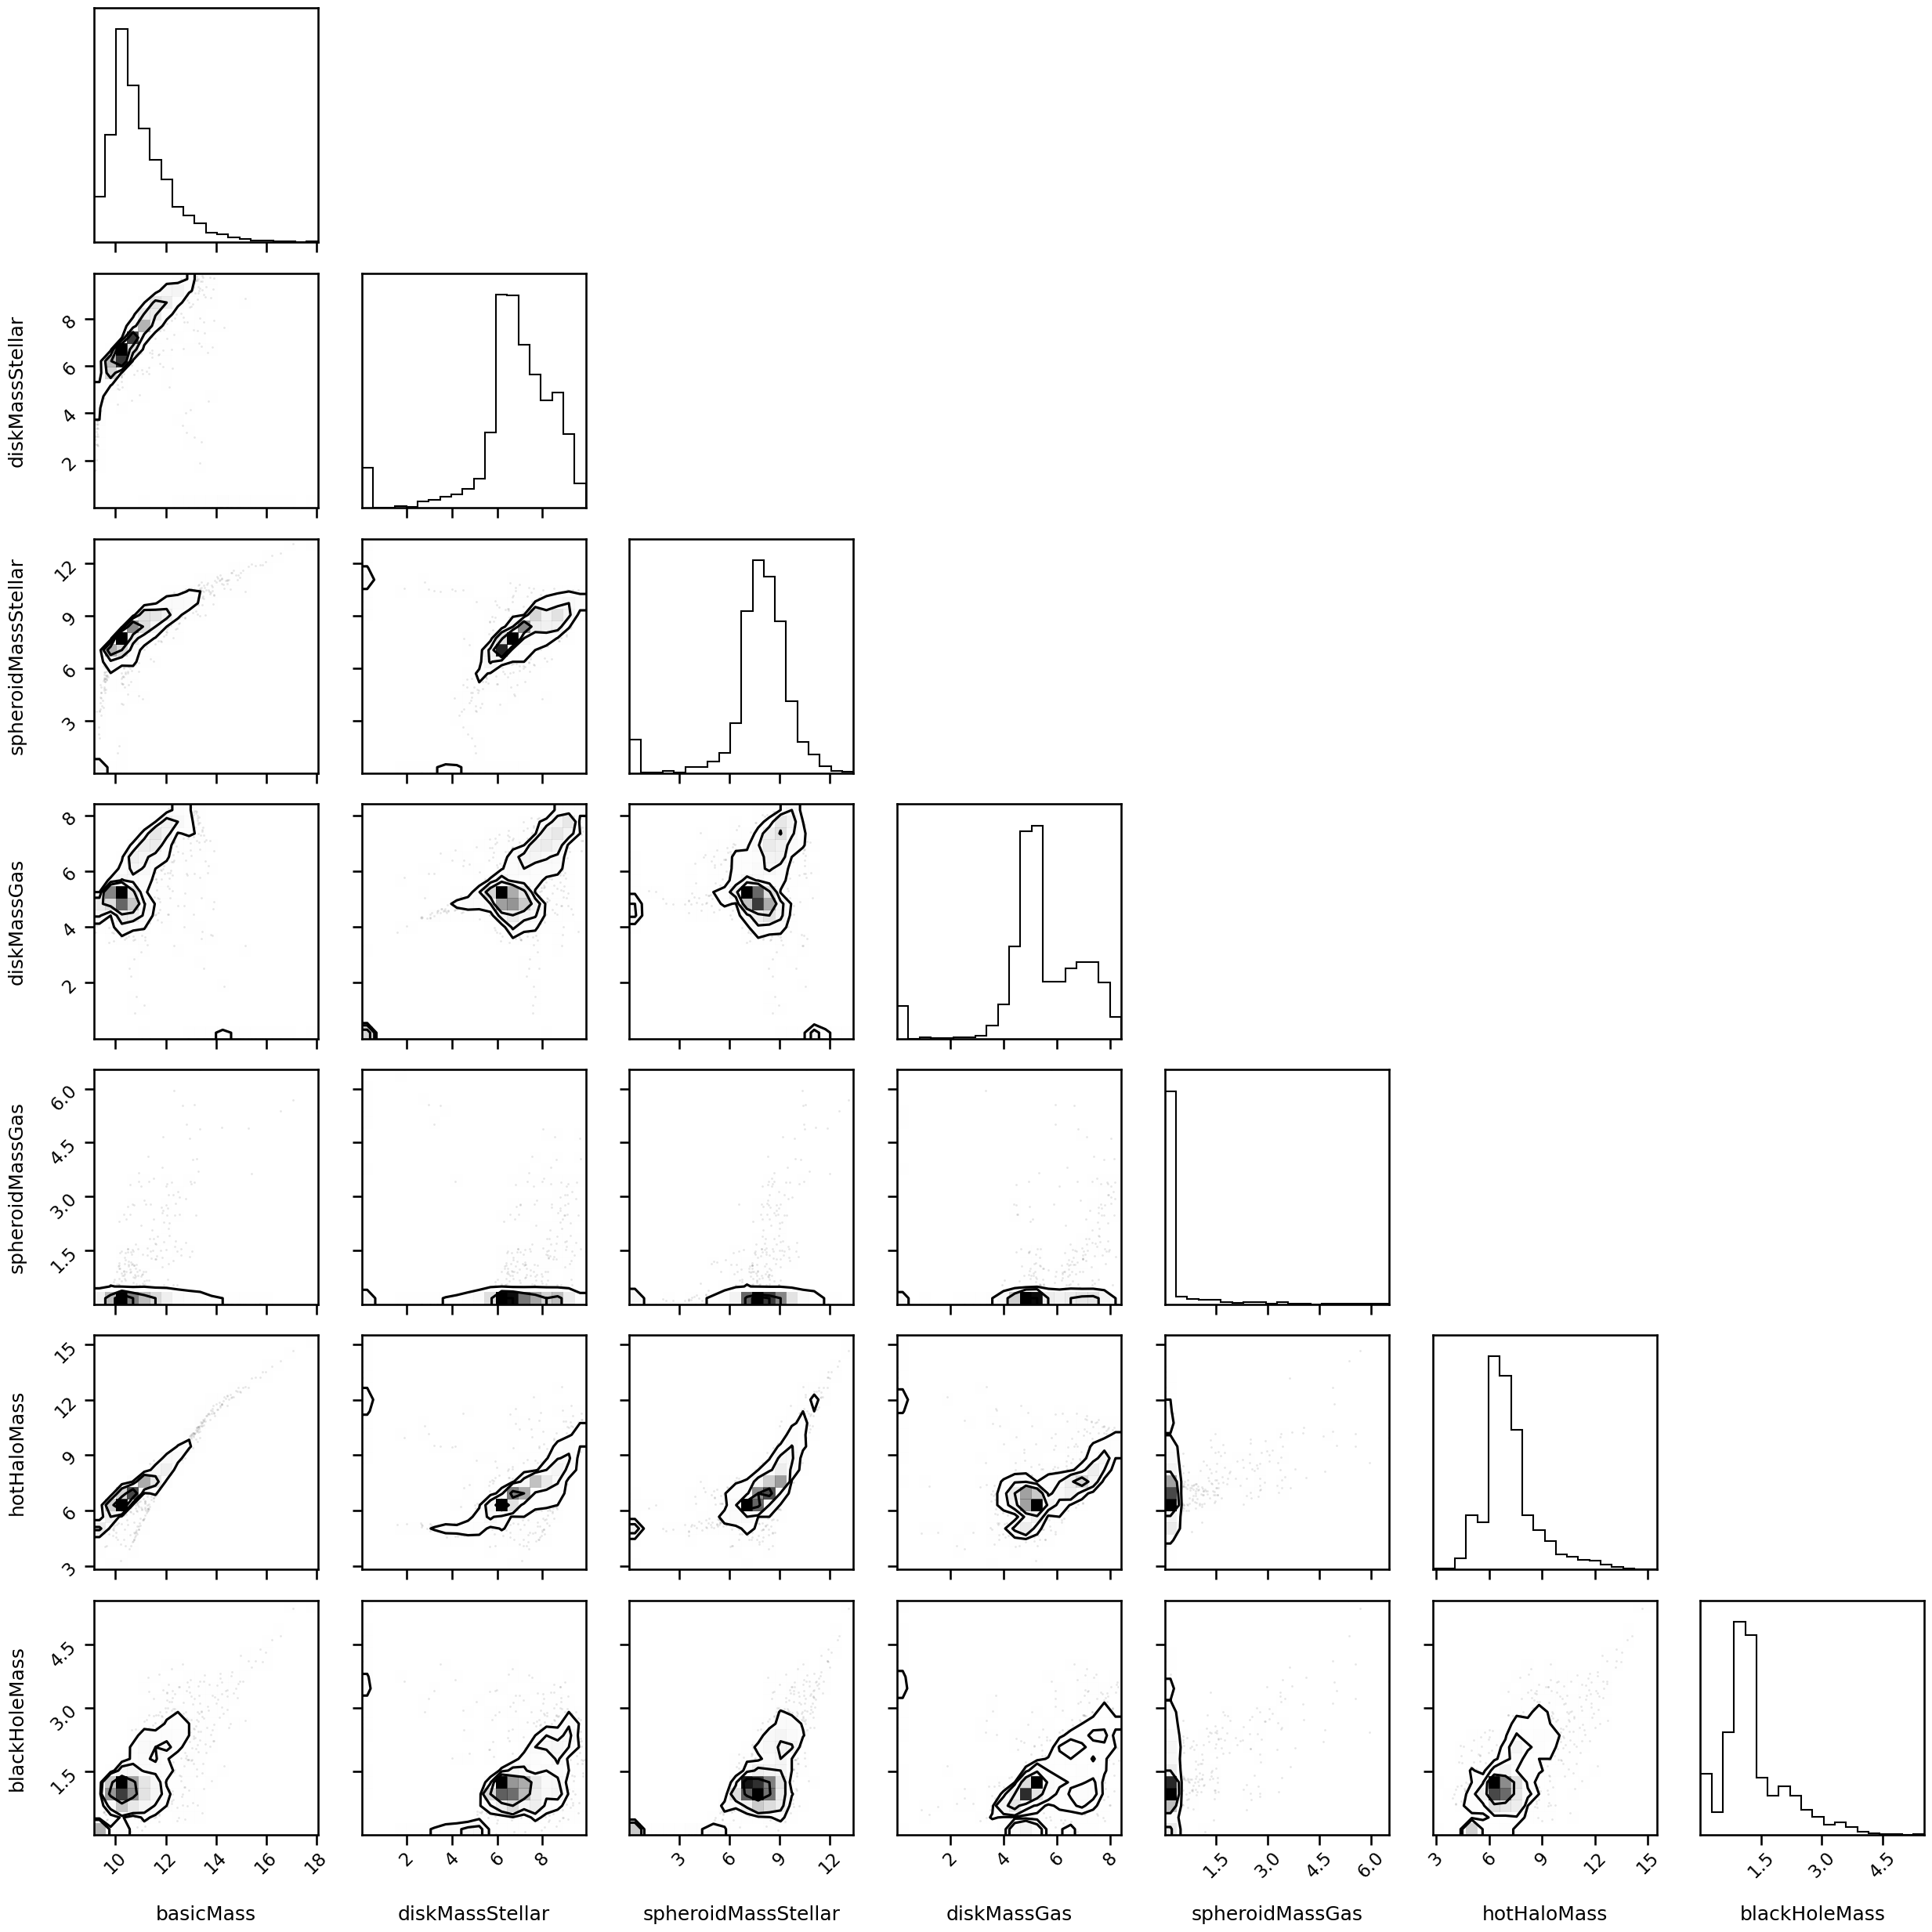

In [131]:
n = 4

# not standardized, does it need to be standardized?
fig = plt.figure(figsize=(25,25))
_ = corner(data, labels=var_names, fig=fig)

In [132]:
# standardize to check for differences later
std_data = StandardScaler().fit_transform(data)

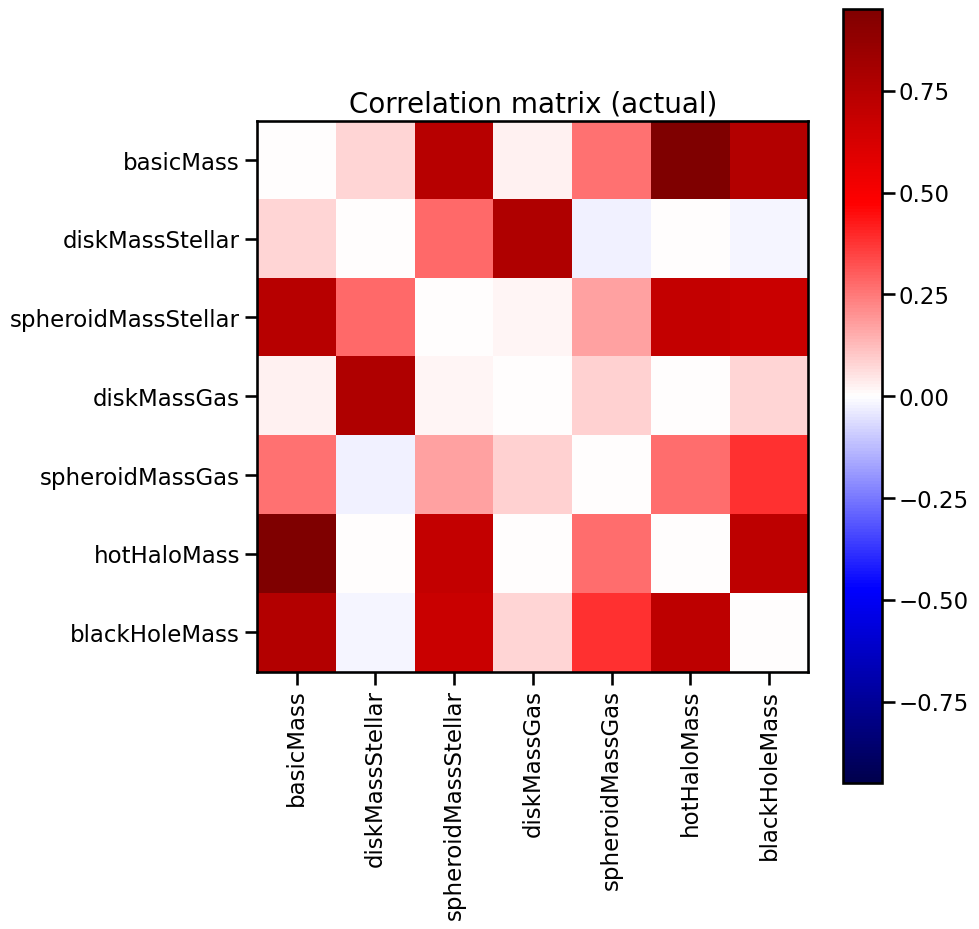

In [133]:
# showing correlation matrix, no difference when standardized
corr = np.corrcoef(data.T)
np.fill_diagonal(corr, 0)
bound = np.max(np.abs(corr))

fig = plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='seismic', vmin=-bound, vmax=bound, interpolation='nearest')
plt.colorbar()
plt.xticks(range(7), var_names, rotation=90)
plt.yticks(range(7), var_names)
plt.title('Correlation matrix (actual)', fontsize=20)
plt.show()

# PC Algorithm without Subsampling

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

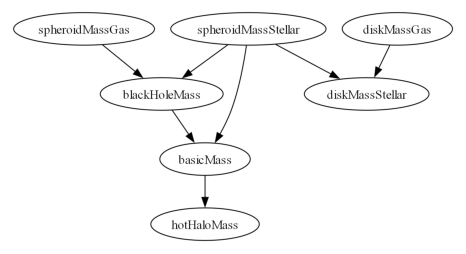

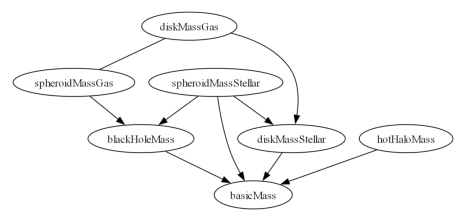

In [134]:
# initial PC testing, no subsampling, no difference when standardized
cg_01_alpha = pc(data, alpha=0.01, indep_test='fisherz')
cg_05_alpha = pc(data, alpha=0.05, indep_test='fisherz')
# std_cg_01_alpha = pc(std_data, alpha=0.01, indep_test='fisherz')
# std_cg_05_alpha = pc(std_data, alpha=0.05, indep_test='fisherz')

plt.figure(0, figsize=(5,5))
cg_01_alpha.draw_pydot_graph(labels=var_names)
plt.show()
plt.figure(1, figsize=(5,5))
cg_05_alpha.draw_pydot_graph(labels=var_names)
plt.show()
# plt.figure(2, figsize=(5,5))
# std_cg_01_alpha.draw_pydot_graph(labels=var_names)
# plt.show()
# plt.figure(3, figsize=(5,5))
# std_cg_05_alpha.draw_pydot_graph(labels=var_names)
# plt.show()

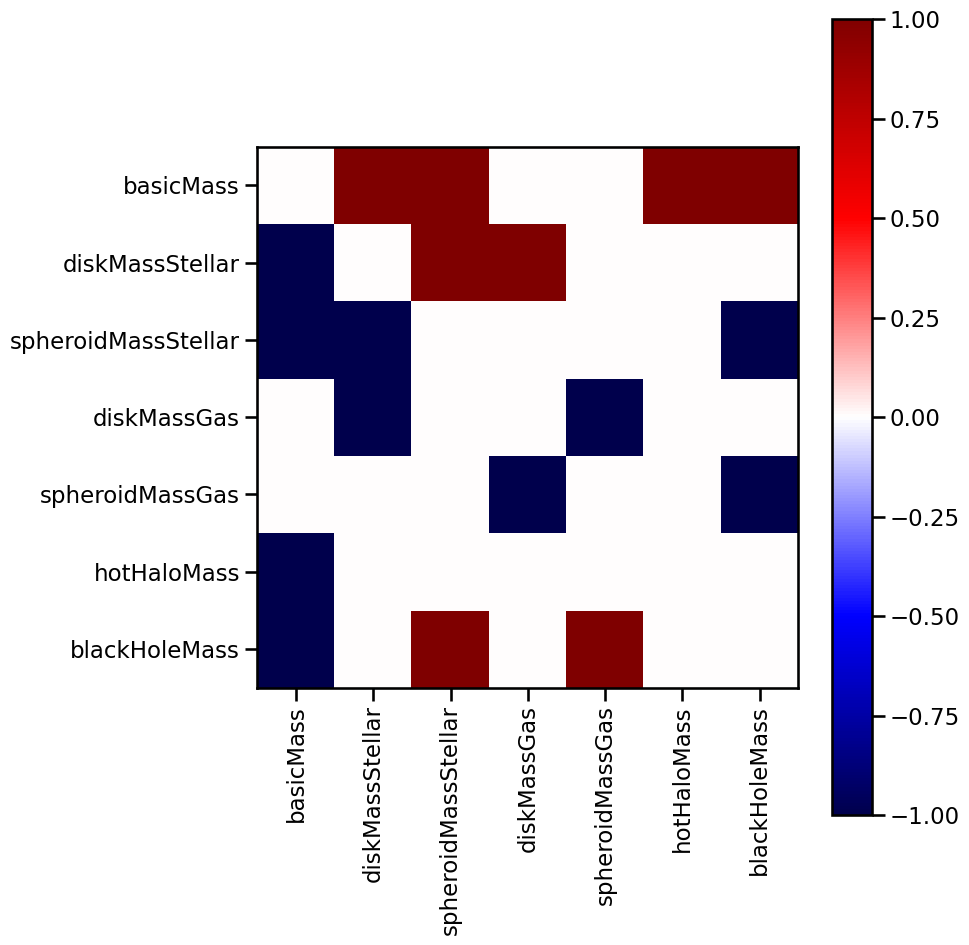

In [135]:
pdag_mat = cg_05_alpha.G.graph

plt.figure(figsize=(10,10))
plt.imshow(pdag_mat, cmap='seismic', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(7), var_names, rotation=90)
_ = plt.yticks(range(7), var_names)

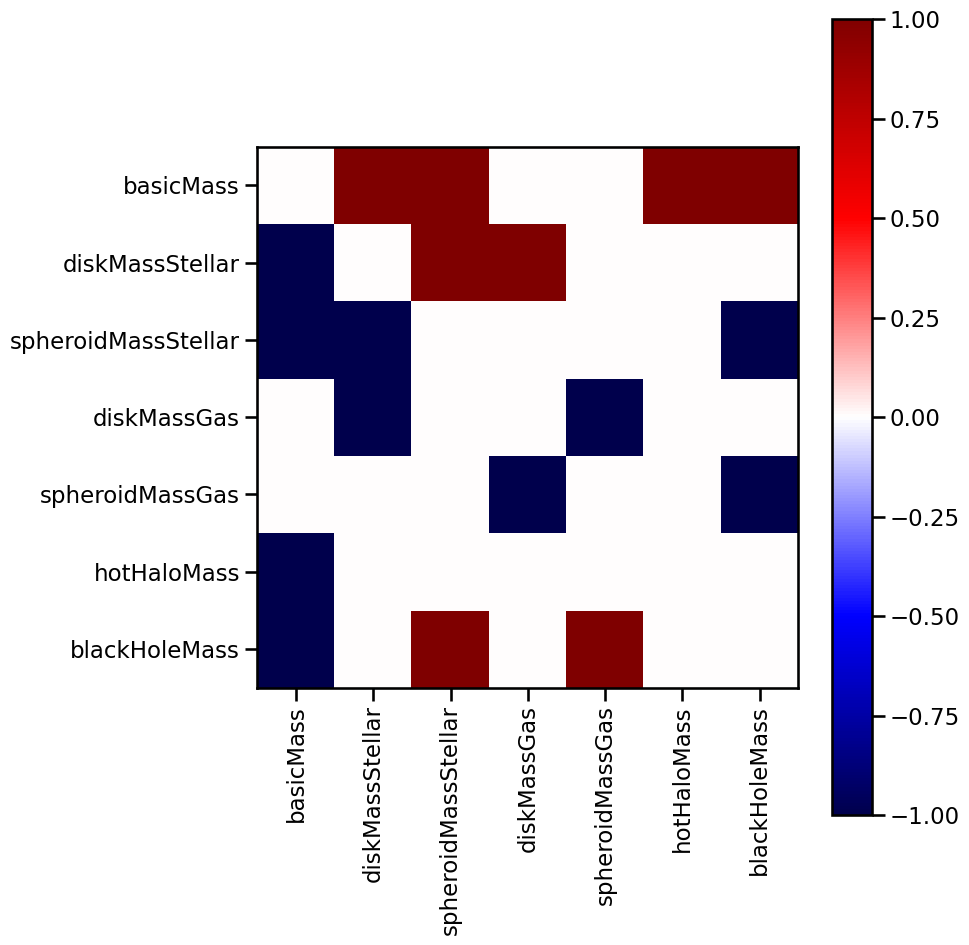

In [136]:
# convert to DAG to direct that one undirected edge and estimate weights
dag_mat = pdag2dag(cg_05_alpha.G).graph

plt.figure(figsize=(10,10))
plt.imshow(pdag_mat, cmap='seismic', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(7), var_names, rotation=90)
_ = plt.yticks(range(7), var_names)

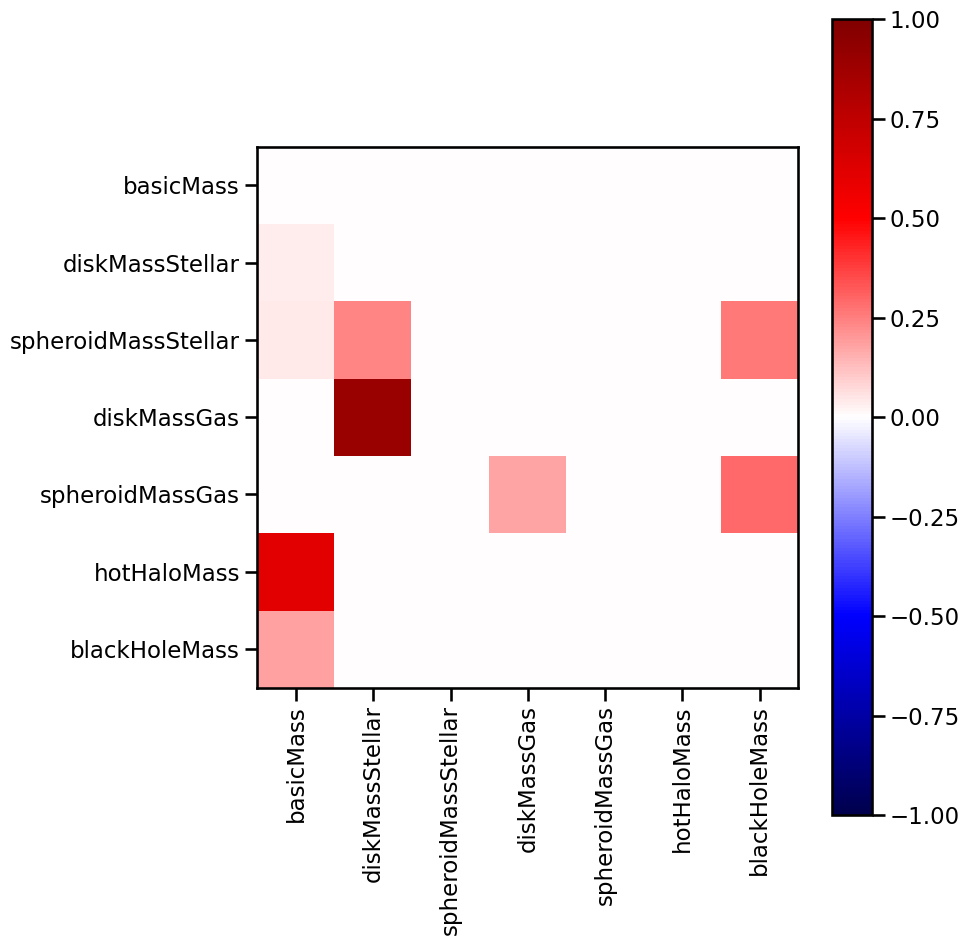

In [142]:
# estimate weights
weights, residuals = estimate_parameters(dag_mat, data)

plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='seismic', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(7), var_names, rotation=90)
_ = plt.yticks(range(7), var_names)

> Note: the diskMassGas-blackHoleMass and spheroidMassGas-blackHoleMass relations have their weights in the upper triangular region which is why they do not appear in the lower triangular region

# PC Algorithm with Subsampling